In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] 
t_c = torch.tensor(t_c) 
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
    return w * t_u +b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) **2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p, t_c)

In [7]:
loss

tensor(1763.8846)

In [8]:
delta = 0.1

In [9]:
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [10]:
loss_rate_of_change_w

tensor(4517.2979)

In [11]:
learning_rate = 1e-2

In [12]:
w = w - learning_rate * loss_rate_of_change_w

In [13]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) -
                         loss_fn(model(t_u, w, b - delta), t_c)/ (2.0 * delta))

In [14]:
b = b - learning_rate * loss_rate_of_change_b

In [15]:
t_un = 0.1*t_u

In [16]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [17]:
def dmodel_dw(t_u, w, b):
    return t_u

In [18]:
def dmodel_db(t_u, w, b):
    return 1.0

In [19]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [20]:
def train_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate*grad
        
        print(f"Epoch: {epoch}, Loss: {float(loss)}.")
    return params

In [21]:
params = train_loop(5000, 1e-2, torch.tensor([1.0, 0]), t_un, t_c)

Epoch: 1, Loss: 80.36434173583984.
Epoch: 2, Loss: 37.57491683959961.
Epoch: 3, Loss: 30.871076583862305.
Epoch: 4, Loss: 29.756193161010742.
Epoch: 5, Loss: 29.50714874267578.
Epoch: 6, Loss: 29.392457962036133.
Epoch: 7, Loss: 29.298828125.
Epoch: 8, Loss: 29.208717346191406.
Epoch: 9, Loss: 29.119417190551758.
Epoch: 10, Loss: 29.030487060546875.
Epoch: 11, Loss: 28.941875457763672.
Epoch: 12, Loss: 28.853565216064453.
Epoch: 13, Loss: 28.76555633544922.
Epoch: 14, Loss: 28.6778507232666.
Epoch: 15, Loss: 28.590431213378906.
Epoch: 16, Loss: 28.503320693969727.
Epoch: 17, Loss: 28.41649627685547.
Epoch: 18, Loss: 28.329975128173828.
Epoch: 19, Loss: 28.243738174438477.
Epoch: 20, Loss: 28.157800674438477.
Epoch: 21, Loss: 28.07215118408203.
Epoch: 22, Loss: 27.986799240112305.
Epoch: 23, Loss: 27.901731491088867.
Epoch: 24, Loss: 27.816953659057617.
Epoch: 25, Loss: 27.732460021972656.
Epoch: 26, Loss: 27.648256301879883.
Epoch: 27, Loss: 27.564342498779297.
Epoch: 28, Loss: 27.4807

Epoch: 531, Loss: 7.366636276245117.
Epoch: 532, Loss: 7.351565837860107.
Epoch: 533, Loss: 7.336549758911133.
Epoch: 534, Loss: 7.321584701538086.
Epoch: 535, Loss: 7.30666971206665.
Epoch: 536, Loss: 7.291802883148193.
Epoch: 537, Loss: 7.276988506317139.
Epoch: 538, Loss: 7.262226581573486.
Epoch: 539, Loss: 7.247512340545654.
Epoch: 540, Loss: 7.232845783233643.
Epoch: 541, Loss: 7.218231201171875.
Epoch: 542, Loss: 7.2036662101745605.
Epoch: 543, Loss: 7.189150810241699.
Epoch: 544, Loss: 7.1746826171875.
Epoch: 545, Loss: 7.160267353057861.
Epoch: 546, Loss: 7.145897388458252.
Epoch: 547, Loss: 7.13157844543457.
Epoch: 548, Loss: 7.117304801940918.
Epoch: 549, Loss: 7.103082656860352.
Epoch: 550, Loss: 7.088911056518555.
Epoch: 551, Loss: 7.074784755706787.
Epoch: 552, Loss: 7.060706615447998.
Epoch: 553, Loss: 7.0466766357421875.
Epoch: 554, Loss: 7.0326948165893555.
Epoch: 555, Loss: 7.018755912780762.
Epoch: 556, Loss: 7.00486946105957.
Epoch: 557, Loss: 6.991029262542725.
Epo

Epoch: 777, Loss: 4.850716590881348.
Epoch: 778, Loss: 4.844189167022705.
Epoch: 779, Loss: 4.837683200836182.
Epoch: 780, Loss: 4.831196308135986.
Epoch: 781, Loss: 4.824737071990967.
Epoch: 782, Loss: 4.818297863006592.
Epoch: 783, Loss: 4.811879634857178.
Epoch: 784, Loss: 4.805481433868408.
Epoch: 785, Loss: 4.799106121063232.
Epoch: 786, Loss: 4.792754650115967.
Epoch: 787, Loss: 4.786421775817871.
Epoch: 788, Loss: 4.780111789703369.
Epoch: 789, Loss: 4.7738237380981445.
Epoch: 790, Loss: 4.767558574676514.
Epoch: 791, Loss: 4.761311054229736.
Epoch: 792, Loss: 4.755086898803711.
Epoch: 793, Loss: 4.748885154724121.
Epoch: 794, Loss: 4.742700576782227.
Epoch: 795, Loss: 4.736537456512451.
Epoch: 796, Loss: 4.730396747589111.
Epoch: 797, Loss: 4.724279403686523.
Epoch: 798, Loss: 4.7181806564331055.
Epoch: 799, Loss: 4.712101459503174.
Epoch: 800, Loss: 4.706046104431152.
Epoch: 801, Loss: 4.700008869171143.
Epoch: 802, Loss: 4.693989276885986.
Epoch: 803, Loss: 4.687995433807373.

Epoch: 1170, Loss: 3.4330294132232666.
Epoch: 1171, Loss: 3.4313135147094727.
Epoch: 1172, Loss: 3.429607629776001.
Epoch: 1173, Loss: 3.427902936935425.
Epoch: 1174, Loss: 3.426203966140747.
Epoch: 1175, Loss: 3.424508810043335.
Epoch: 1176, Loss: 3.422823905944824.
Epoch: 1177, Loss: 3.4211440086364746.
Epoch: 1178, Loss: 3.4194676876068115.
Epoch: 1179, Loss: 3.417797803878784.
Epoch: 1180, Loss: 3.4161341190338135.
Epoch: 1181, Loss: 3.4144766330718994.
Epoch: 1182, Loss: 3.4128241539001465.
Epoch: 1183, Loss: 3.4111762046813965.
Epoch: 1184, Loss: 3.409534454345703.
Epoch: 1185, Loss: 3.4078993797302246.
Epoch: 1186, Loss: 3.4062719345092773.
Epoch: 1187, Loss: 3.4046454429626465.
Epoch: 1188, Loss: 3.403024196624756.
Epoch: 1189, Loss: 3.4014129638671875.
Epoch: 1190, Loss: 3.3998024463653564.
Epoch: 1191, Loss: 3.3981995582580566.
Epoch: 1192, Loss: 3.396601915359497.
Epoch: 1193, Loss: 3.3950111865997314.
Epoch: 1194, Loss: 3.3934249877929688.
Epoch: 1195, Loss: 3.3918447494506

Epoch: 1544, Loss: 3.0693259239196777.
Epoch: 1545, Loss: 3.068845272064209.
Epoch: 1546, Loss: 3.0683655738830566.
Epoch: 1547, Loss: 3.0678870677948.
Epoch: 1548, Loss: 3.0674123764038086.
Epoch: 1549, Loss: 3.066937208175659.
Epoch: 1550, Loss: 3.0664637088775635.
Epoch: 1551, Loss: 3.065993309020996.
Epoch: 1552, Loss: 3.0655243396759033.
Epoch: 1553, Loss: 3.0650551319122314.
Epoch: 1554, Loss: 3.0645883083343506.
Epoch: 1555, Loss: 3.0641226768493652.
Epoch: 1556, Loss: 3.063659906387329.
Epoch: 1557, Loss: 3.0631988048553467.
Epoch: 1558, Loss: 3.0627381801605225.
Epoch: 1559, Loss: 3.0622804164886475.
Epoch: 1560, Loss: 3.0618224143981934.
Epoch: 1561, Loss: 3.0613677501678467.
Epoch: 1562, Loss: 3.0609130859375.
Epoch: 1563, Loss: 3.0604612827301025.
Epoch: 1564, Loss: 3.060011148452759.
Epoch: 1565, Loss: 3.059561014175415.
Epoch: 1566, Loss: 3.0591139793395996.
Epoch: 1567, Loss: 3.0586676597595215.
Epoch: 1568, Loss: 3.0582213401794434.
Epoch: 1569, Loss: 3.0577797889709473

Epoch: 1928, Loss: 2.966036081314087.
Epoch: 1929, Loss: 2.965904474258423.
Epoch: 1930, Loss: 2.965776205062866.
Epoch: 1931, Loss: 2.965646266937256.
Epoch: 1932, Loss: 2.9655165672302246.
Epoch: 1933, Loss: 2.9653871059417725.
Epoch: 1934, Loss: 2.9652605056762695.
Epoch: 1935, Loss: 2.9651308059692383.
Epoch: 1936, Loss: 2.965005397796631.
Epoch: 1937, Loss: 2.9648778438568115.
Epoch: 1938, Loss: 2.9647512435913086.
Epoch: 1939, Loss: 2.9646248817443848.
Epoch: 1940, Loss: 2.9645001888275146.
Epoch: 1941, Loss: 2.9643747806549072.
Epoch: 1942, Loss: 2.964250326156616.
Epoch: 1943, Loss: 2.9641263484954834.
Epoch: 1944, Loss: 2.964000940322876.
Epoch: 1945, Loss: 2.963878631591797.
Epoch: 1946, Loss: 2.9637563228607178.
Epoch: 1947, Loss: 2.963632106781006.
Epoch: 1948, Loss: 2.963510751724243.
Epoch: 1949, Loss: 2.963388204574585.
Epoch: 1950, Loss: 2.963266134262085.
Epoch: 1951, Loss: 2.963148593902588.
Epoch: 1952, Loss: 2.963026285171509.
Epoch: 1953, Loss: 2.962906837463379.
E

Epoch: 2292, Loss: 2.938779354095459.
Epoch: 2293, Loss: 2.9387433528900146.
Epoch: 2294, Loss: 2.9387052059173584.
Epoch: 2295, Loss: 2.9386672973632812.
Epoch: 2296, Loss: 2.938628911972046.
Epoch: 2297, Loss: 2.9385931491851807.
Epoch: 2298, Loss: 2.9385550022125244.
Epoch: 2299, Loss: 2.938519239425659.
Epoch: 2300, Loss: 2.9384806156158447.
Epoch: 2301, Loss: 2.938443899154663.
Epoch: 2302, Loss: 2.938408136367798.
Epoch: 2303, Loss: 2.938371181488037.
Epoch: 2304, Loss: 2.9383347034454346.
Epoch: 2305, Loss: 2.9382987022399902.
Epoch: 2306, Loss: 2.9382622241973877.
Epoch: 2307, Loss: 2.9382269382476807.
Epoch: 2308, Loss: 2.9381906986236572.
Epoch: 2309, Loss: 2.938155174255371.
Epoch: 2310, Loss: 2.9381182193756104.
Epoch: 2311, Loss: 2.938084363937378.
Epoch: 2312, Loss: 2.9380486011505127.
Epoch: 2313, Loss: 2.938014030456543.
Epoch: 2314, Loss: 2.937976837158203.
Epoch: 2315, Loss: 2.937943458557129.
Epoch: 2316, Loss: 2.937908172607422.
Epoch: 2317, Loss: 2.9378724098205566

Epoch: 2731, Loss: 2.9301488399505615.
Epoch: 2732, Loss: 2.9301393032073975.
Epoch: 2733, Loss: 2.930130958557129.
Epoch: 2734, Loss: 2.9301233291625977.
Epoch: 2735, Loss: 2.9301130771636963.
Epoch: 2736, Loss: 2.930107355117798.
Epoch: 2737, Loss: 2.930098533630371.
Epoch: 2738, Loss: 2.9300901889801025.
Epoch: 2739, Loss: 2.9300811290740967.
Epoch: 2740, Loss: 2.9300730228424072.
Epoch: 2741, Loss: 2.9300644397735596.
Epoch: 2742, Loss: 2.930056095123291.
Epoch: 2743, Loss: 2.9300482273101807.
Epoch: 2744, Loss: 2.9300413131713867.
Epoch: 2745, Loss: 2.9300317764282227.
Epoch: 2746, Loss: 2.9300222396850586.
Epoch: 2747, Loss: 2.930016279220581.
Epoch: 2748, Loss: 2.9300081729888916.
Epoch: 2749, Loss: 2.9300003051757812.
Epoch: 2750, Loss: 2.9299919605255127.
Epoch: 2751, Loss: 2.929983377456665.
Epoch: 2752, Loss: 2.9299750328063965.
Epoch: 2753, Loss: 2.9299681186676025.
Epoch: 2754, Loss: 2.9299604892730713.
Epoch: 2755, Loss: 2.929953098297119.
Epoch: 2756, Loss: 2.92994523048

Epoch: 3081, Loss: 2.9284074306488037.
Epoch: 3082, Loss: 2.928403615951538.
Epoch: 3083, Loss: 2.9284021854400635.
Epoch: 3084, Loss: 2.928398847579956.
Epoch: 3085, Loss: 2.9283957481384277.
Epoch: 3086, Loss: 2.9283957481384277.
Epoch: 3087, Loss: 2.928391933441162.
Epoch: 3088, Loss: 2.928388833999634.
Epoch: 3089, Loss: 2.9283859729766846.
Epoch: 3090, Loss: 2.9283831119537354.
Epoch: 3091, Loss: 2.928382635116577.
Epoch: 3092, Loss: 2.9283790588378906.
Epoch: 3093, Loss: 2.928378105163574.
Epoch: 3094, Loss: 2.928375005722046.
Epoch: 3095, Loss: 2.9283721446990967.
Epoch: 3096, Loss: 2.928370475769043.
Epoch: 3097, Loss: 2.928367853164673.
Epoch: 3098, Loss: 2.9283640384674072.
Epoch: 3099, Loss: 2.9283623695373535.
Epoch: 3100, Loss: 2.9283607006073.
Epoch: 3101, Loss: 2.928356885910034.
Epoch: 3102, Loss: 2.9283547401428223.
Epoch: 3103, Loss: 2.9283533096313477.
Epoch: 3104, Loss: 2.9283487796783447.
Epoch: 3105, Loss: 2.9283478260040283.
Epoch: 3106, Loss: 2.928344964981079.


Epoch: 3411, Loss: 2.92789363861084.
Epoch: 3412, Loss: 2.9278924465179443.
Epoch: 3413, Loss: 2.9278929233551025.
Epoch: 3414, Loss: 2.927891492843628.
Epoch: 3415, Loss: 2.9278905391693115.
Epoch: 3416, Loss: 2.927889823913574.
Epoch: 3417, Loss: 2.9278905391693115.
Epoch: 3418, Loss: 2.9278879165649414.
Epoch: 3419, Loss: 2.9278883934020996.
Epoch: 3420, Loss: 2.9278855323791504.
Epoch: 3421, Loss: 2.927886962890625.
Epoch: 3422, Loss: 2.927884578704834.
Epoch: 3423, Loss: 2.9278838634490967.
Epoch: 3424, Loss: 2.9278829097747803.
Epoch: 3425, Loss: 2.9278810024261475.
Epoch: 3426, Loss: 2.9278807640075684.
Epoch: 3427, Loss: 2.92788028717041.
Epoch: 3428, Loss: 2.927880048751831.
Epoch: 3429, Loss: 2.9278793334960938.
Epoch: 3430, Loss: 2.92787766456604.
Epoch: 3431, Loss: 2.9278769493103027.
Epoch: 3432, Loss: 2.9278764724731445.
Epoch: 3433, Loss: 2.9278762340545654.
Epoch: 3434, Loss: 2.9278764724731445.
Epoch: 3435, Loss: 2.927875280380249.
Epoch: 3436, Loss: 2.927874803543091.

Epoch: 3733, Loss: 2.9277288913726807.
Epoch: 3734, Loss: 2.927729606628418.
Epoch: 3735, Loss: 2.9277288913726807.
Epoch: 3736, Loss: 2.9277281761169434.
Epoch: 3737, Loss: 2.9277281761169434.
Epoch: 3738, Loss: 2.9277281761169434.
Epoch: 3739, Loss: 2.927727460861206.
Epoch: 3740, Loss: 2.9277281761169434.
Epoch: 3741, Loss: 2.9277281761169434.
Epoch: 3742, Loss: 2.9277265071868896.
Epoch: 3743, Loss: 2.927727460861206.
Epoch: 3744, Loss: 2.9277257919311523.
Epoch: 3745, Loss: 2.9277257919311523.
Epoch: 3746, Loss: 2.927725076675415.
Epoch: 3747, Loss: 2.927724599838257.
Epoch: 3748, Loss: 2.927724599838257.
Epoch: 3749, Loss: 2.9277236461639404.
Epoch: 3750, Loss: 2.9277243614196777.
Epoch: 3751, Loss: 2.9277236461639404.
Epoch: 3752, Loss: 2.927725315093994.
Epoch: 3753, Loss: 2.9277238845825195.
Epoch: 3754, Loss: 2.9277236461639404.
Epoch: 3755, Loss: 2.9277231693267822.
Epoch: 3756, Loss: 2.927722692489624.
Epoch: 3757, Loss: 2.927722215652466.
Epoch: 3758, Loss: 2.9277219772338

Epoch: 4039, Loss: 2.9276742935180664.
Epoch: 4040, Loss: 2.927675724029541.
Epoch: 4041, Loss: 2.9276750087738037.
Epoch: 4042, Loss: 2.9276747703552246.
Epoch: 4043, Loss: 2.927675485610962.
Epoch: 4044, Loss: 2.9276740550994873.
Epoch: 4045, Loss: 2.92767333984375.
Epoch: 4046, Loss: 2.9276747703552246.
Epoch: 4047, Loss: 2.9276742935180664.
Epoch: 4048, Loss: 2.927673578262329.
Epoch: 4049, Loss: 2.9276747703552246.
Epoch: 4050, Loss: 2.9276726245880127.
Epoch: 4051, Loss: 2.9276747703552246.
Epoch: 4052, Loss: 2.9276750087738037.
Epoch: 4053, Loss: 2.92767333984375.
Epoch: 4054, Loss: 2.92767333984375.
Epoch: 4055, Loss: 2.9276742935180664.
Epoch: 4056, Loss: 2.92767333984375.
Epoch: 4057, Loss: 2.9276740550994873.
Epoch: 4058, Loss: 2.9276719093322754.
Epoch: 4059, Loss: 2.9276742935180664.
Epoch: 4060, Loss: 2.9276747703552246.
Epoch: 4061, Loss: 2.9276726245880127.
Epoch: 4062, Loss: 2.9276726245880127.
Epoch: 4063, Loss: 2.9276747703552246.
Epoch: 4064, Loss: 2.927672624588012

Epoch: 4372, Loss: 2.927656650543213.
Epoch: 4373, Loss: 2.9276552200317383.
Epoch: 4374, Loss: 2.927656650543213.
Epoch: 4375, Loss: 2.9276559352874756.
Epoch: 4376, Loss: 2.9276552200317383.
Epoch: 4377, Loss: 2.927654266357422.
Epoch: 4378, Loss: 2.927654504776001.
Epoch: 4379, Loss: 2.927654981613159.
Epoch: 4380, Loss: 2.9276540279388428.
Epoch: 4381, Loss: 2.9276556968688965.
Epoch: 4382, Loss: 2.927654504776001.
Epoch: 4383, Loss: 2.927654504776001.
Epoch: 4384, Loss: 2.927654981613159.
Epoch: 4385, Loss: 2.9276556968688965.
Epoch: 4386, Loss: 2.9276559352874756.
Epoch: 4387, Loss: 2.9276552200317383.
Epoch: 4388, Loss: 2.9276535511016846.
Epoch: 4389, Loss: 2.9276535511016846.
Epoch: 4390, Loss: 2.9276540279388428.
Epoch: 4391, Loss: 2.927654981613159.
Epoch: 4392, Loss: 2.9276556968688965.
Epoch: 4393, Loss: 2.927654504776001.
Epoch: 4394, Loss: 2.927656412124634.
Epoch: 4395, Loss: 2.927654981613159.
Epoch: 4396, Loss: 2.927654266357422.
Epoch: 4397, Loss: 2.927654981613159.


Epoch: 4841, Loss: 2.927649736404419.
Epoch: 4842, Loss: 2.9276483058929443.
Epoch: 4843, Loss: 2.927647590637207.
Epoch: 4844, Loss: 2.9276487827301025.
Epoch: 4845, Loss: 2.9276468753814697.
Epoch: 4846, Loss: 2.9276466369628906.
Epoch: 4847, Loss: 2.9276483058929443.
Epoch: 4848, Loss: 2.9276468753814697.
Epoch: 4849, Loss: 2.927647590637207.
Epoch: 4850, Loss: 2.927647352218628.
Epoch: 4851, Loss: 2.9276483058929443.
Epoch: 4852, Loss: 2.927647352218628.
Epoch: 4853, Loss: 2.9276480674743652.
Epoch: 4854, Loss: 2.9276487827301025.
Epoch: 4855, Loss: 2.9276468753814697.
Epoch: 4856, Loss: 2.9276480674743652.
Epoch: 4857, Loss: 2.927647352218628.
Epoch: 4858, Loss: 2.9276483058929443.
Epoch: 4859, Loss: 2.9276483058929443.
Epoch: 4860, Loss: 2.927647352218628.
Epoch: 4861, Loss: 2.9276483058929443.
Epoch: 4862, Loss: 2.927645683288574.
Epoch: 4863, Loss: 2.9276483058929443.
Epoch: 4864, Loss: 2.927647590637207.
Epoch: 4865, Loss: 2.9276466369628906.
Epoch: 4866, Loss: 2.9276480674743

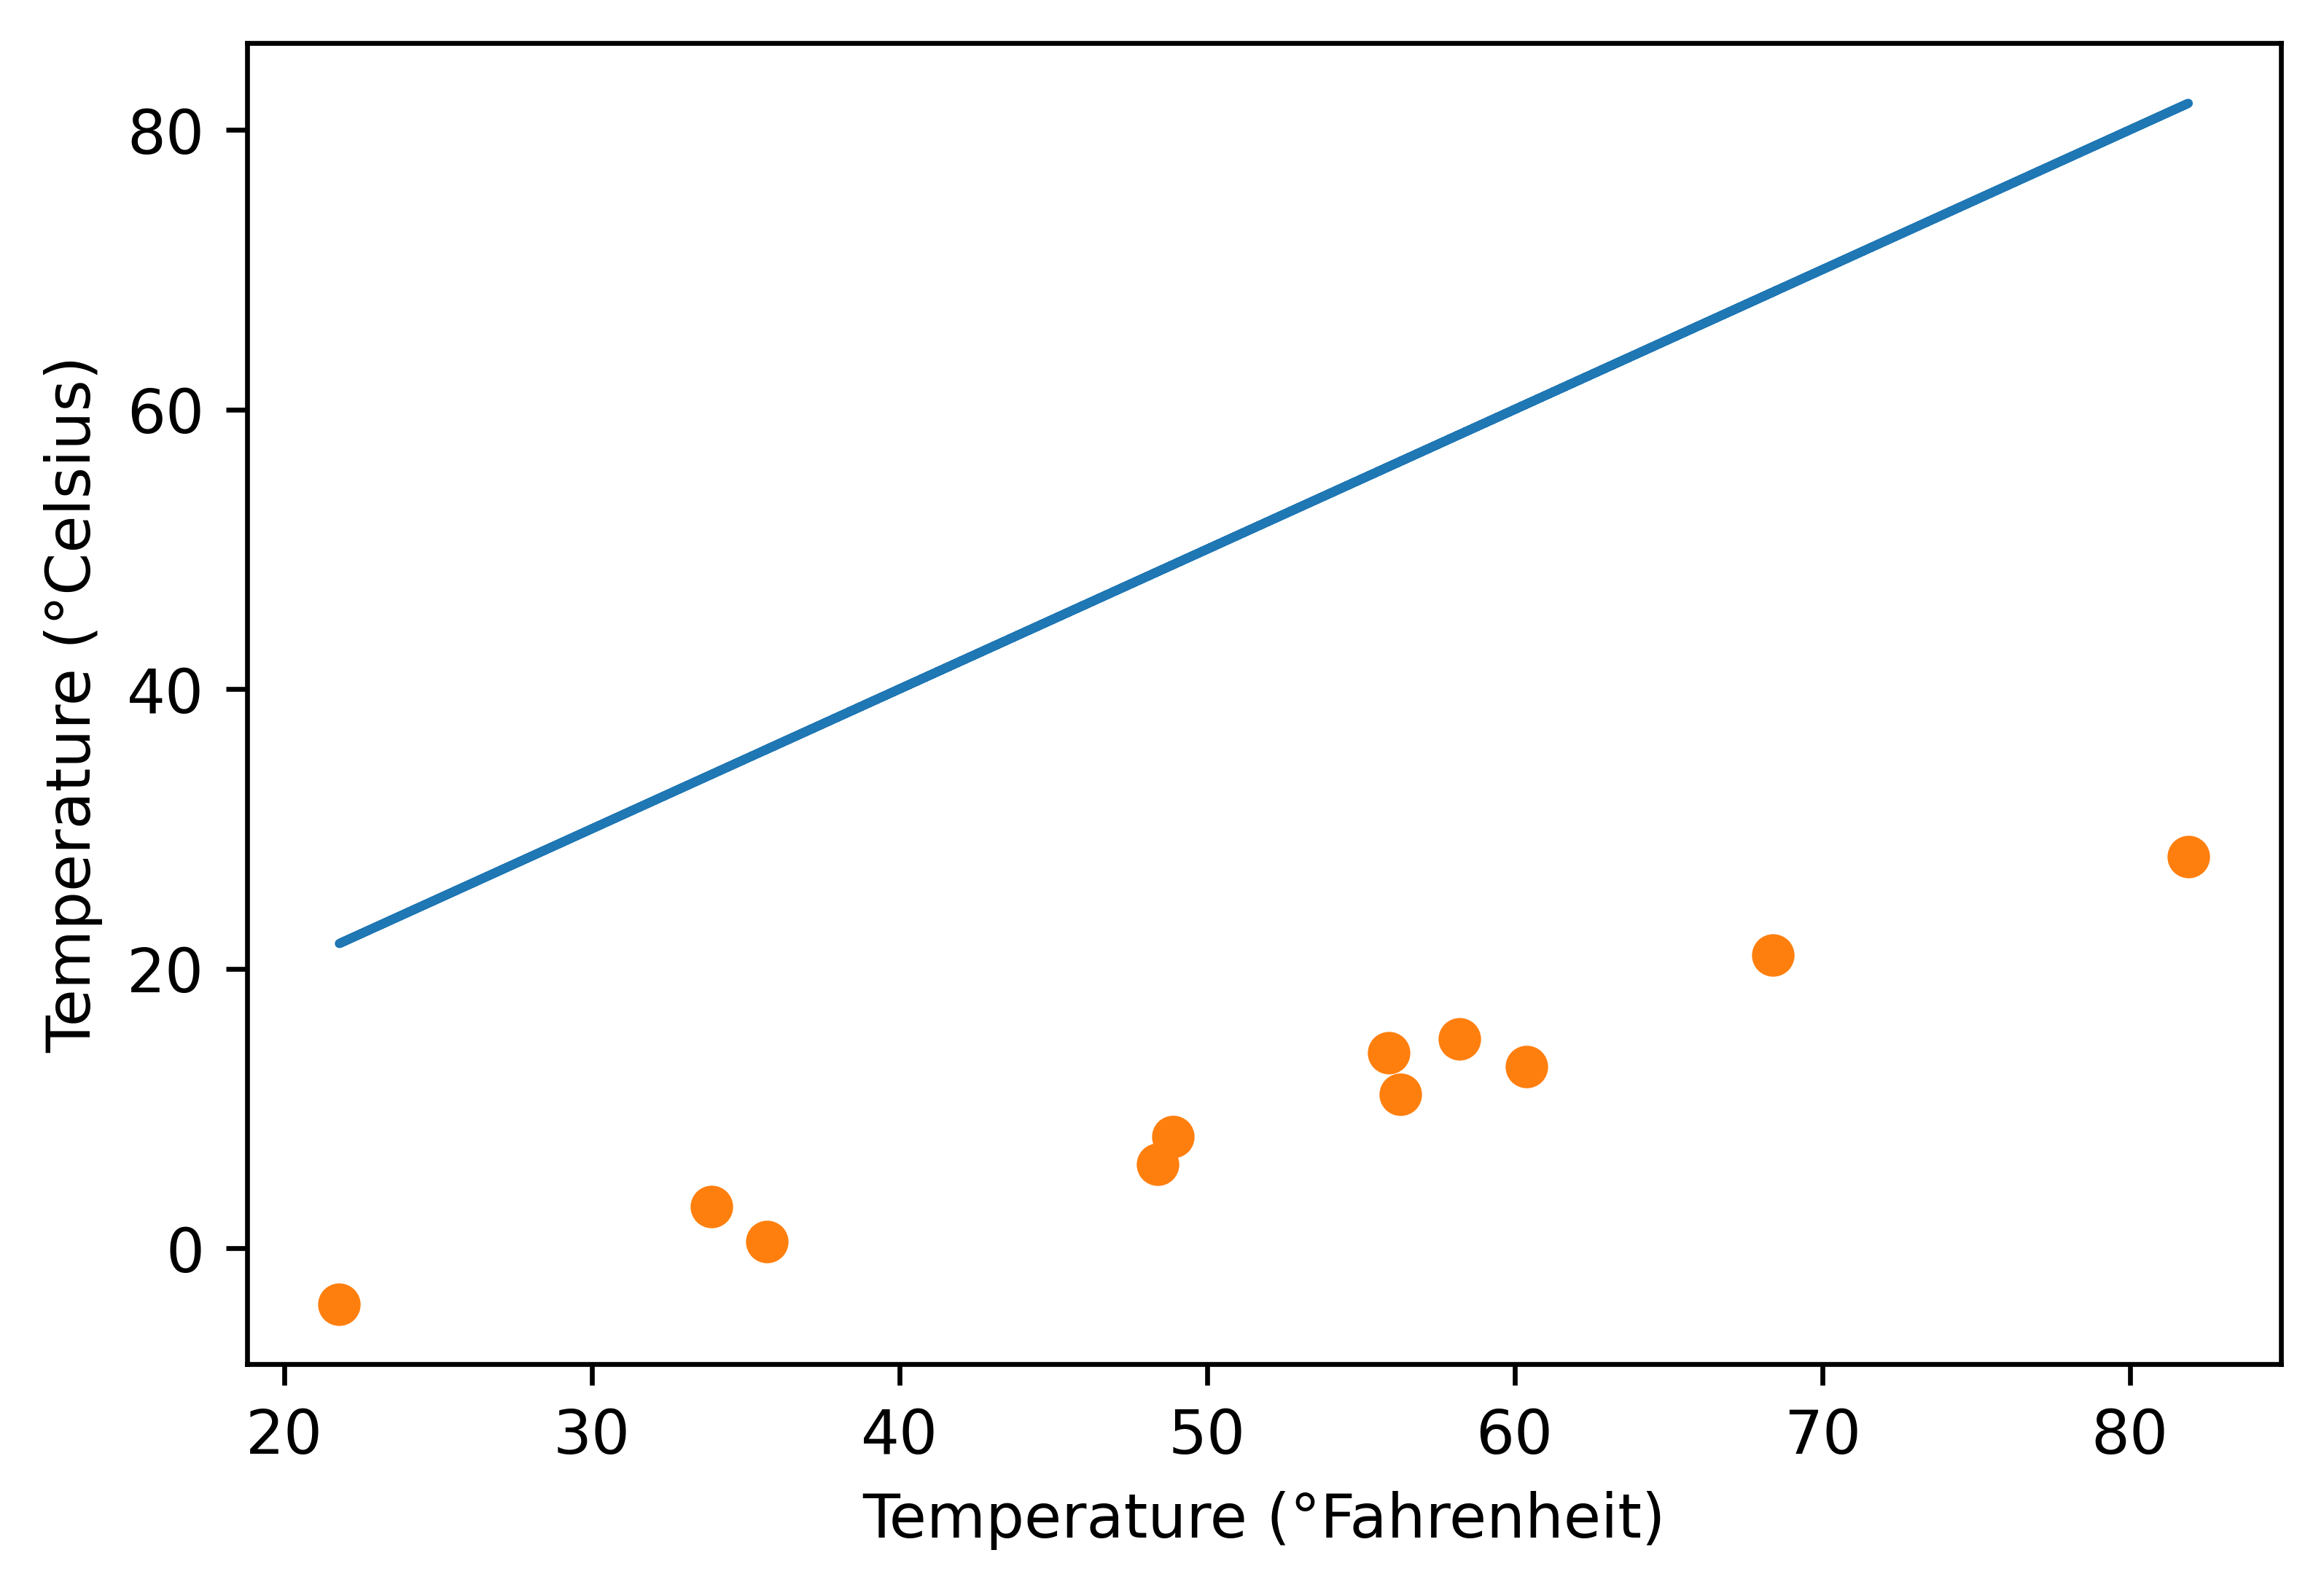

In [22]:
fig = plt.figure(dpi = 600)
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.xlabel("Temperature (°Fahrenheit)") 
plt.ylabel("Temperature (°Celsius)")
plt.show()

In [45]:
params = torch.tensor([1.0,0.0], requires_grad = True)

In [30]:
params.grad is None

True

In [51]:
loss = loss_fn(model(t_u, *params), t_c)

In [52]:
loss.backward()

In [57]:
params.grad

tensor([-1.1444e-05, -1.1444e-05])

In [35]:
if params.grad is not None:
    params.grad.zero_()

In [48]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {float(loss):.2f}")
    return params

In [63]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c): 
    for epoch in range(1, n_epochs + 1): 
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c) 
        loss.backward()
    
        with torch.no_grad(): 
            params -= learning_rate * params.grad
    
        if epoch % 500 == 0: 
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [65]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] 
t_c = torch.tensor(t_c) 
t_u = torch.tensor(t_u)

In [66]:
t_un = 0.1*t_u

In [69]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [71]:
params = training_loop(n_epochs = 5000, 
                       learning_rate= 1e-2, 
                       params = torch.tensor([1, 0.0], requires_grad = True),
                       t_u = t_un,
                       t_c = t_c)

Epoch 500, Loss 52.061947
Epoch 1000, Loss 52.061947
Epoch 1500, Loss 52.061947
Epoch 2000, Loss 52.061947
Epoch 2500, Loss 52.061947
Epoch 3000, Loss 52.061947
Epoch 3500, Loss 52.061947
Epoch 4000, Loss 52.061947
Epoch 4500, Loss 52.061947
Epoch 5000, Loss 52.061947


In [62]:
params

tensor([  5.3464, -16.6536], requires_grad=True)

In [23]:
import torch.optim as optim

In [24]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [25]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate =1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [28]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

In [29]:
optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [37]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch: {epoch:d} Loss: {float(loss):.2f}")
                  
    return params

## Optimizer: 
* SGD

In [42]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate =1e-2
optimizer = optim.SGD([params], lr = learning_rate)

In [43]:
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch: 500 Loss: 7.86
Epoch: 1000 Loss: 3.83
Epoch: 1500 Loss: 3.09
Epoch: 2000 Loss: 2.96
Epoch: 2500 Loss: 2.93
Epoch: 3000 Loss: 2.93
Epoch: 3500 Loss: 2.93
Epoch: 4000 Loss: 2.93
Epoch: 4500 Loss: 2.93
Epoch: 5000 Loss: 2.93


tensor([  5.3671, -17.3012], requires_grad=True)

## Optimizer:
* ADAM

In [44]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate =1e-2
optimizer = optim.Adam([params], lr = learning_rate)

In [45]:
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch: 500 Loss: 24.95
Epoch: 1000 Loss: 15.75
Epoch: 1500 Loss: 9.46
Epoch: 2000 Loss: 5.77
Epoch: 2500 Loss: 3.93
Epoch: 3000 Loss: 3.20
Epoch: 3500 Loss: 2.98
Epoch: 4000 Loss: 2.93
Epoch: 4500 Loss: 2.93
Epoch: 5000 Loss: 2.93


tensor([  5.3660, -17.2952], requires_grad=True)

## Splitting data in pytorch

In [48]:
n_samples = t_u.shape[0]
n_val = int(0.2 *n_samples)

shuffled_indicies = torch.randperm(n_samples)

train_indicies = shuffled_indicies[:-n_val]
val_indicies = shuffled_indicies[-n_val:]

train_indicies, val_indicies

(tensor([ 6,  2,  1,  3, 10,  4,  8,  7,  9]), tensor([5, 0]))

In [61]:
train_t_u = t_u[train_indicies]
train_t_c = t_c[train_indicies]

val_t_u = t_u[val_indicies]
val_t_c = t_c[val_indicies]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [57]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch: {epoch:d} Training Loss: {float(train_loss):.4f} Validation Loss: {float(val_loss):.4f}")
                  
    return params

In [60]:
params = torch.tensor([1.0, 0.0], requires_grad=True) 
learning_rate = 1e-2 
optimizer = optim.SGD([params], lr=learning_rate)

In [62]:
training_loop(n_epochs = 3000, 
              optimizer = optimizer, 
              params = params, 
              train_t_u =train_t_un,
              val_t_u = val_t_un, 
              train_t_c = train_t_c, 
              val_t_c = val_t_c)

Epoch: 1 Training Loss: 96.1012 Validation Loss: 9.5485
Epoch: 2 Training Loss: 35.6511 Validation Loss: 22.7698
Epoch: 3 Training Loss: 28.4114 Validation Loss: 35.2234
Epoch: 500 Training Loss: 7.5929 Validation Loss: 13.7212
Epoch: 1000 Training Loss: 3.9681 Validation Loss: 6.1071
Epoch: 1500 Training Loss: 3.3146 Validation Loss: 3.8031
Epoch: 2000 Training Loss: 3.1968 Validation Loss: 2.9923
Epoch: 2500 Training Loss: 3.1756 Validation Loss: 2.6782
Epoch: 3000 Training Loss: 3.1717 Validation Loss: 2.5503


tensor([  5.2345, -16.3226], requires_grad=True)

Add context manager

In [64]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch: {epoch:d} Training Loss: {float(train_loss):.4f} Validation Loss: {float(val_loss):.4f}")
                  
    return params